In [ ]:
# Write this line to import pandas
import pandas

In [ ]:
data_frame = pandas.read_csv('addition_dataset.csv')

In [ ]:
data_frame

,parameter1,parameter2,parameter3,parameter4,output
0,724,433,546,386,2089
1,679,249,504,982,2414
2,118,320,761,71,1270
3,945,231,342,487,2005
4,294,138,730,506,1668
...,...,...,...,...,...
9995,337,969,849,129,2284
9996,381,807,772,742,2702
9997,768,883,663,744,3058
9998,50,60,264,269,643


In [ ]:
# seperate input and output variables

# we remove output column and assign all the remaining columns to X
# axis 1 means remove it from columns

X = data_frame.drop(['output'],axis=1)

# selecting output column from data_frame which stores our data
# and save it to y
y = data_frame['output']

In [ ]:
# We seperated the inputs & outputs, X has inputs
X

,parameter1,parameter2,parameter3,parameter4
0,724,433,546,386
1,679,249,504,982
2,118,320,761,71
3,945,231,342,487
4,294,138,730,506
...,...,...,...,...
9995,337,969,849,129
9996,381,807,772,742
9997,768,883,663,744
9998,50,60,264,269


In [ ]:
# y has outputs
y

0       2089
1       2414
2       1270
3       2005
4       1668
        ... 
9995    2284
9996    2702
9997    3058
9998     643
9999    2266
Name: output, Length: 10000, dtype: int64

In [ ]:
#  We perform scaling of data

from sklearn import preprocessing
# we create a new variable with name scaler
# scaler will use standard deviation on column to scale
# it for model to prevent bias
scaler = preprocessing.StandardScaler()

X = scaler.fit_transform(X)
X

array([[ 0.78986233, -0.21291381,  0.16767217, -0.39187349],
       [ 0.63344335, -0.85221534,  0.02267154,  1.66182269],
       [-1.31657996, -0.60552834,  0.9099373 , -1.47730016],
       ...,
       [ 0.94280533,  1.35059536,  0.57160249,  0.84172254],
       [-1.55294642, -1.50888919, -0.80590349, -0.79503196],
       [ 1.38773043, -0.73408354, -0.99233287,  1.3000138 ]])

In [ ]:
# Split the data in test and train set
from sklearn.model_selection import train_test_split
#  we import train test split to split data set in two sets
# train and test set

#  X_train will have independent variables for training
#  y_train will have dependant variable for training
#  X_test will have independant variables for testing
#  y_test will have dependant variables for testing
#  test size will be used to calculate ratio/percentage for splitting
#  0.30 is like 0.30 x 100 = 30% for testing
#  random_state will be used to specify randomness in the selection
#  it will set the initial value used for using random rows in dataset
#  0 will set the randomness to not happen and other
#  value will result in random selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [ ]:
# Length of training data we have split

len(X_train)

7000

In [ ]:
# Length of testing data we have split

len(X_test)

3000

In [ ]:
# Show training data after transformation
X_train

array([[ 0.06685903, -0.25808186,  1.17922418, -0.63307941],
       [ 1.13398409,  0.89544046,  0.4818402 , -0.79847776],
       [-0.40587389,  1.68414398, -0.52280702, -1.12238286],
       ...,
       [ 0.1954702 ,  0.23876661, -0.82316547, -1.04312949],
       [-1.52861458, -1.40465525, -1.5619782 , -1.6737107 ],
       [-0.13474765, -1.5575317 , -0.40542556, -1.10859967]])

In [ ]:
# Show training expected outputs, these are used to
# validate the model output in each epoch while training
y_train

7681    2091
9031    2480
3691    1879
202     2746
5625    2203
        ... 
9225    2095
4859    2898
3264    1572
9845     206
2732    1062
Name: output, Length: 7000, dtype: int64

In [ ]:
# Show testing data after transformation
X_test

array([[-1.64679781, -1.66524011,  0.85815136, -1.50142075],
       [-1.53904251,  0.73214062,  0.47493541, -0.70888699],
       [ 0.98104108,  1.29847838, -0.63673609, -1.27399802],
       ...,
       [-1.50080676, -0.51171779, -1.4756683 ,  1.23798942],
       [ 0.09814283, -1.06763216,  1.29660564, -1.14305766],
       [ 0.76553049, -1.03288751,  1.31041523,  0.34208169]])

In [ ]:
y_test

9394     848
898     1688
2398    2090
5906    1510
2343    2085
        ... 
4004    1748
7375    2714
9307    1341
8394    1753
5233    2390
Name: output, Length: 3000, dtype: int64

In [ ]:
# tensorflow package keras is used to develop ANNs
import keras

In [ ]:
# we create model for the ANN
# Sequential will run each neuron layer sequentially, 1 then 2 3,4,5 and so on
model = keras.Sequential([
    # X.shape[1] will specify the input columns/features count in data
    # activation function is used to randomly activate neuron for the input
    # neurons will be decreased in each layer as it converges to output
    keras.layers.Dense(4, activation=keras.activations.relu, input_dim=X.shape[1]),
    keras.layers.Dense(100, activation=keras.activations.relu),
    keras.layers.Dense(20, activation=keras.activations.relu),
    keras.layers.Dense(8, activation=keras.activations.relu),
    keras.layers.Dense(1) # output layer
    # output layer is used to predict
    # for classification it can be increased but ANN architecture will change
])

In [ ]:
# specifing the hyper parameters for the model

# optimizer function model for changing weights in every epoch
# error calculation function for every epoch to check accuracy
# metrics are optional but are used to calculate accuracy, errors & other statistics
# learning rate will specify at what rate the weights have to be
# changed in every epoch

# no output will be shown in this step
model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['mae'])

In [ ]:
# we train the model in the given dataset
# batch size is used to specify the number of batches for that epoch
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
219/219 [==============================] - 2s 3ms/step - loss: 3794020.0000 - mae: 1858.4000 - val_loss: 1681318.2500 - val_mae: 1228.4534
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 373781.7812 - mae: 477.0546 - val_loss: 154357.0938 - val_mae: 318.3452
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 117728.7500 - mae: 281.0337 - val_loss: 96397.9844 - val_mae: 254.5817
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 78482.3203 - mae: 229.2106 - val_loss: 67340.7031 - val_mae: 212.3477
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 55693.5508 - mae: 191.6487 - val_loss: 48525.0547 - val_mae: 179.3744
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 40632.7266 - mae: 161.7956 - val_loss: 35763.5742 - val_mae: 153.2599
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 30288.6289 - mae: 138.1459 - val_loss: 26560.2

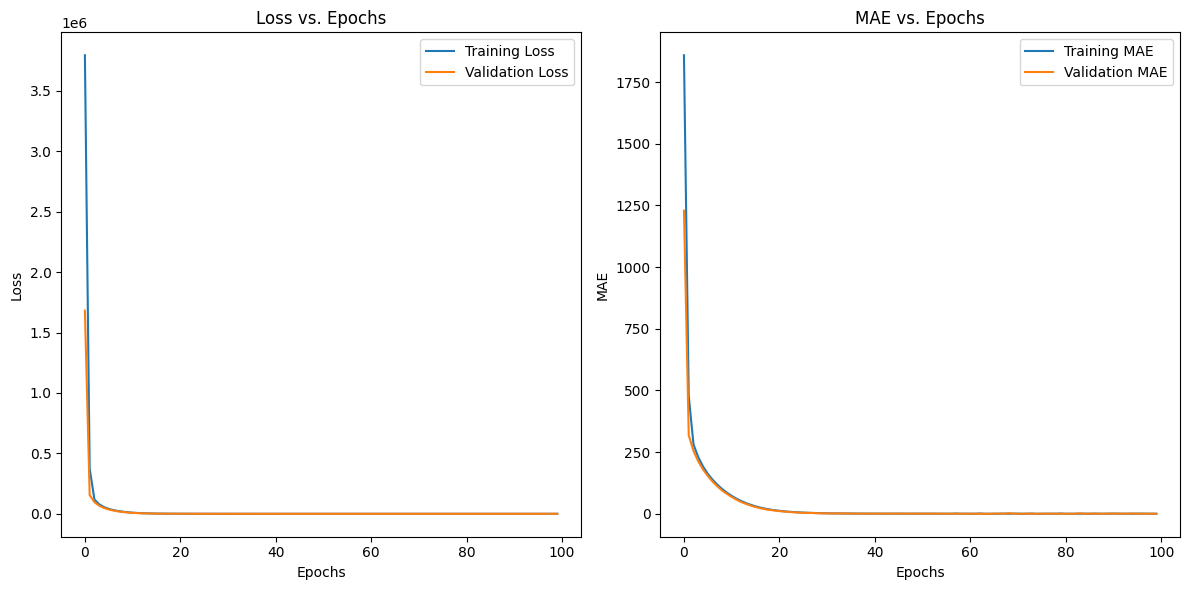

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epochs')

# Plot training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('MAE vs. Epochs')

plt.tight_layout()
plt.show()

In [ ]:
# for layer in model.layers:
#   print(layer.get_config(), layer.get_weights())

In [ ]:
# saving model for future use
model.save('my_model.h5')

In [ ]:
# use previously saved mode
old_model = keras.models.load_model('my_model.h5')

# Show the model architecture
# old_model.summary()

In [ ]:
# importing numpy
import numpy

# manual testing by providing input variables
single_row = numpy.array([[333, 333, 1000, 1000]])

# performing scaling as we did on our training data
scaled_single_row = scaler.transform(single_row)

# predicting the output
predictions = old_model.predict(scaled_single_row)

# printing the predictions
print(predictions[0][0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
2665.6958
